Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The query used a deprecated function: `id`.} {position: line: 3, column: 8, offset: 51} for query: '\nMATCH (c:Customer)-[:PURCHASED]->(o:Order)\nRETURN id(c) AS customer_id,\n       c.companyName AS company,\n       COUNT(o) AS num_orders,\n       SUM(toFloat(o.freight)) AS total_freight\n'


Aperçu des données récupérées :


,customer_id,company,num_orders,total_freight
0,892,Alfreds Futterkiste,6,225.58
1,893,Ana Trujillo Emparedados y helados,4,97.42
2,894,Antonio Moreno Taquería,7,268.52
3,895,Around the Horn,13,471.95
4,896,Berglunds snabbköp,18,1559.52


Centres des clusters :
[[1.64000000e+01 1.68775000e+03]
 [2.96666667e+01 6.16490667e+03]
 [6.07407407e+00 2.16611667e+02]
 [1.13181818e+01 8.12429091e+02]]


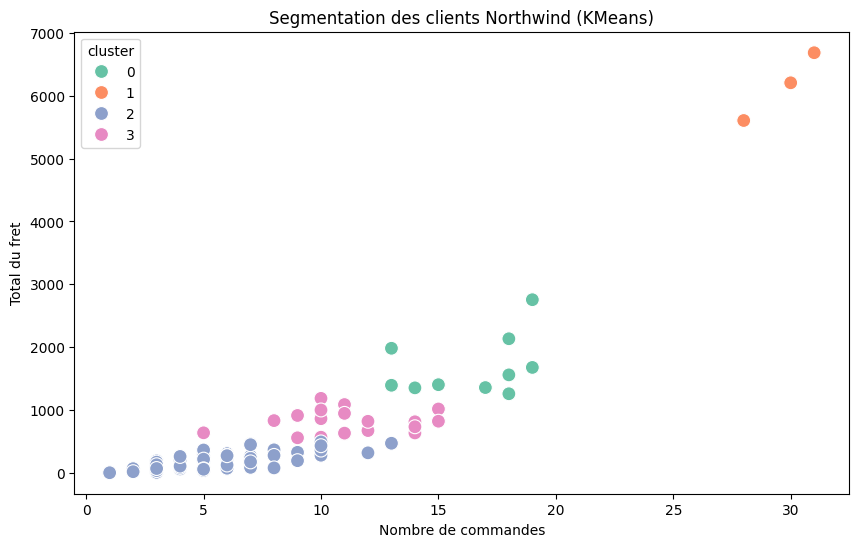

Clients avec cluster assigné :


,customer_id,company,num_orders,total_freight,cluster
0,892,Alfreds Futterkiste,6,225.58,2
1,893,Ana Trujillo Emparedados y helados,4,97.42,2
2,894,Antonio Moreno Taquería,7,268.52,2
3,895,Around the Horn,13,471.95,2
4,896,Berglunds snabbköp,18,1559.52,0
5,897,Blauer See Delikatessen,7,168.26,2
6,898,Blondesddsl père et fils,11,623.66,3
7,899,Bólido Comidas preparadas,3,191.17,2
8,900,Bon app',17,1357.87,0
9,901,Bottom-Dollar Markets,14,793.95,3


In [9]:
# =========================
# Librairies
# =========================
from neo4j import GraphDatabase
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# Connexion Neo4j
# =========================
uri = "bolt://localhost:7687"
user = "neo4j"
password = "plbconsultant"

driver = GraphDatabase.driver(uri, auth=(user, password))

# =========================
# Récupération des données clients
# =========================
query = """
MATCH (c:Customer)-[:PURCHASED]->(o:Order)
RETURN id(c) AS customer_id,
       c.companyName AS company,
       COUNT(o) AS num_orders,
       SUM(toFloat(o.freight)) AS total_freight
"""

with driver.session() as session:
    result = session.run(query)
    df = pd.DataFrame([dict(record) for record in result])

print("Aperçu des données récupérées :")
display(df.head())

# =========================
# Clustering KMeans
# =========================
# Features pour clustering : nombre de commandes et total du fret
X = df[['num_orders', 'total_freight']].fillna(0)

# Nombre de clusters souhaités
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

print("Centres des clusters :")
print(kmeans.cluster_centers_)

# =========================
# Visualisation
# =========================
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='num_orders', y='total_freight', hue='cluster', palette='Set2', s=100)
plt.title("Segmentation des clients Northwind (KMeans)")
plt.xlabel("Nombre de commandes")
plt.ylabel("Total du fret")
plt.show()

# =========================
# Résultat final
# =========================
print("Clients avec cluster assigné :")
display(df.head(10))
